In [164]:
%matplotlib inline
#from IPython.html.widgets import interact, fixed
import ipywidgets 
#from IPython.html import widgets
import numpy as np
#import sympy
#from sympy import *
#from control import matlab
#import control
#import scipy
import matplotlib.pyplot as plt
#import seaborn; seaborn.set()


## RLC low pass filter step response 

<img src="images/RLClowpass.png" width="600" height="600">

<img src="images/RLClowpass2.png" width="500" height="400">



In [165]:
def pltRLC(vin,L,R,C):
    N = 500 # number of samples
    t = np.linspace(0,10,N) # time vector
    A = -vin 
    B = -vin/(R*C)
    a = 1/(2*R*C)
    b = np.sqrt(1/(L*C)-1/(4*(R**2)*(C**2)))
    c = 1/(L*C)
    vout = vin + np.exp(-a*t)*(A*np.cos(b*t)+((B-A*a)/b)*np.sin(b*t)) # compute response to step v_in 
    # figure
    plt.figure(figsize=(15,5))
    plt.plot(t,vout,linewidth=2,label='v_out(t)')
    plt.plot(t,vin*np.ones(N),linewidth=2,linestyle='--',label='v_in(t)')
    plt.xlabel('Time [s]')
    plt.ylabel('v_out [V]')
    plt.legend()
    plt.grid()

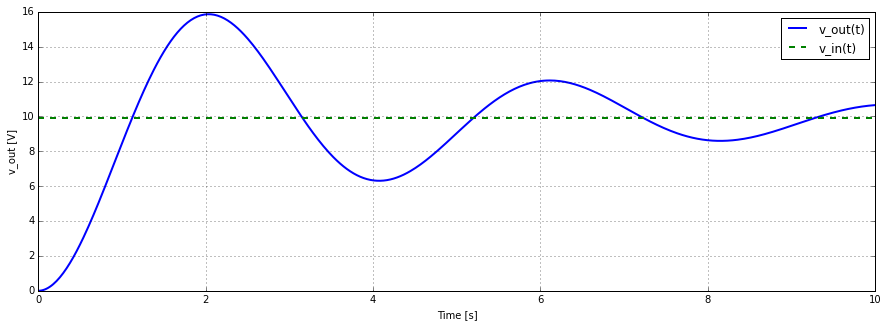

In [166]:
ipywidgets.interact(pltRLC, vin=(0,20,0.1), L=(1e-1,2,0.1),R=(1,10,0.1),C=(1e-2,1,0.1));


In [167]:
from control import matlab
import control
import scipy

In [168]:
def pltLRCbode(omega,z):
    sys = control.tf(omega**2,[1,2*z*omega,omega**2]) # creates transfer function
    plt.figure(figsize=(12,6)) 
    mag, phase, w = matlab.bode(sys,np.logspace(1,3,1000),linewidth=2) # Bode diagram

# RLC low pass filter Bode diagram

 $$H(s) = \frac{\omega_n^2}{s^2+2\zeta\omega_n+\omega_n^2}$$

c:\users\alex\anaconda3\lib\site-packages\control-0.6d-py3.4.egg\control\freqplot.py:124: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


<function __main__.pltLRCbode>

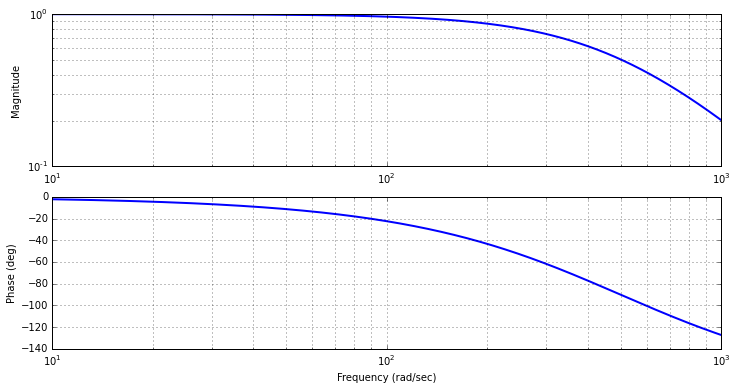

In [169]:
ipywidgets.interact(pltLRCbode, omega=(0.1,1000,1), z=(0,2,0.01))

# Time response to sinusoidal inputs

 $$H(s) = \frac{\omega_n^2}{s^2+2\zeta\omega_n+\omega_n^2}$$
    
 $$u(t) = \sin(ft)$$
    

In [202]:
def pltLRC_forced(omega,z,f):
    N = 300 # number of points
    tend = 20 # end time
    t = np.linspace(0,tend,N) # time vector
    u = np.sin(f*t) # sinusoidal input signal with freq z
    sys = control.tf(omega**2,[1,2*z*omega,omega**2]) # creates transfer function system
    t, yout, xout = control.forced_response(sys, t, u, 0) # simulates system response to input u
    # figures
    plt.figure(figsize=(12,6))
    plt.plot(t,u,'k--',linewidth=2,label='v_in(t)')
    plt.plot(t,yout,'b',linewidth =2,label='v_out(t)')
    plt.grid()
    plt.xlabel("Time (s)")
    plt.legend()
    #plt.show()

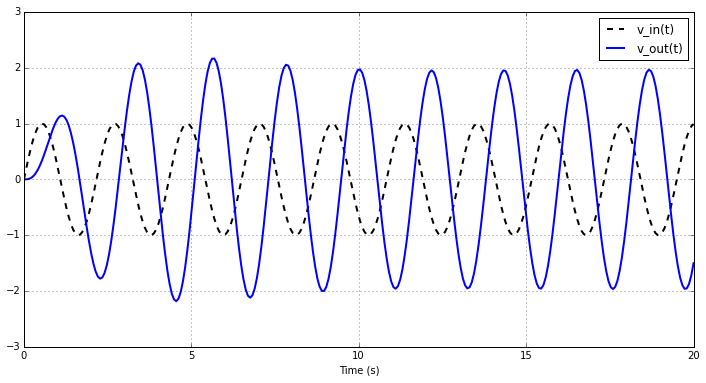

In [203]:
ipywidgets.interact(pltLRC_forced, omega=(0.1,5,.1), z=(0,2,0.01), f=(0.1,10,.1))

In [194]:
from IPython.display import display
#omega=(0.1,5,.1), z=(0,2,0.01), f=(0.1,10,.1))
omega = ipywidgets.FloatSlider(min =0.1,max=5,step=.1,value=1,description='Natural frequency w')
z = ipywidgets.FloatSlider(min =0,max=2,step=.01,value=.4,description='Damping coefficient')
f = ipywidgets.FloatSlider(min =0.1,max=10,step=.1,value=1,description='Input sine wave frequency')
display(omega,z,f)

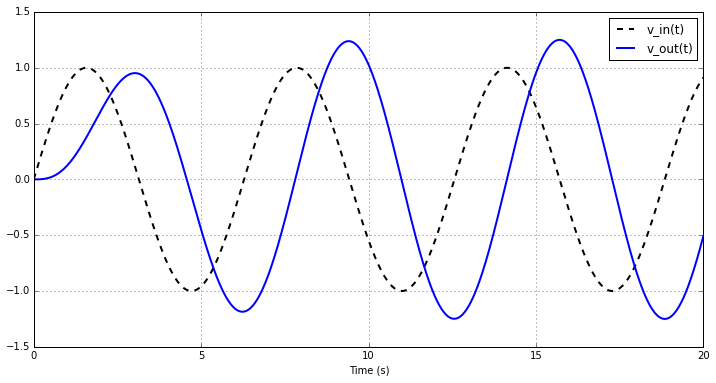

In [196]:
pltLRC_forced(omega.value,z.value,f.value) # press Shift+Enter to execute cell and update plot after changing slider values